In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'data/processed_temperature_data.csv'

df = pd.read_csv(path, index_col=0)

In [75]:
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,Annual_uncertainty
Year,,,,,,,,,,,,,,
1850.0,-0.675,-0.333,-0.591,-0.589,-0.509,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404,-0.418,0.155349
1851.0,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228,-0.233,0.196316
1852.0,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065,-0.229,0.216206
1853.0,-0.233,-0.404,-0.280,-0.386,-0.268,-0.142,-0.083,-0.057,-0.250,-0.392,-0.411,-0.337,-0.270,0.118765
1854.0,-0.381,-0.361,-0.243,-0.334,-0.289,-0.299,-0.179,-0.239,-0.217,-0.095,-0.410,-0.450,-0.292,0.098235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020.0,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.014,0.693,0.923,0.135179
2021.0,0.701,0.565,0.726,0.760,0.706,0.713,0.792,0.799,0.868,0.907,0.854,0.751,0.762,0.087788
2022.0,0.779,0.764,0.890,0.770,0.761,0.858,0.778,0.853,0.790,0.929,0.675,0.768,0.801,0.066009


In [76]:
T = df.values[:, :-2].flatten()[:-5]

# smooth data
# T_smooth = np.convolve(T, np.ones(12)/12, mode='valid')
# T = T_smooth
# T_annual = df.Annual.values
# # T = T_annual
# time = df.index

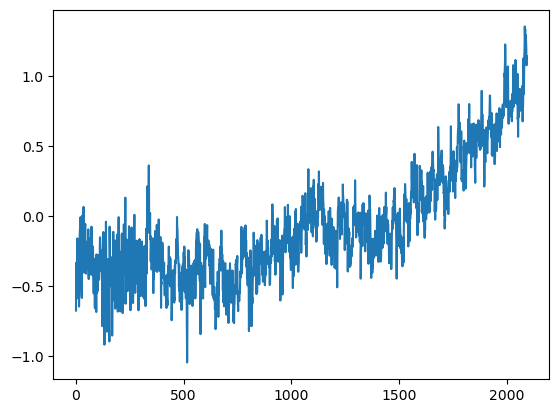

In [77]:
plt.plot(T)
plt.show()
# forecasting


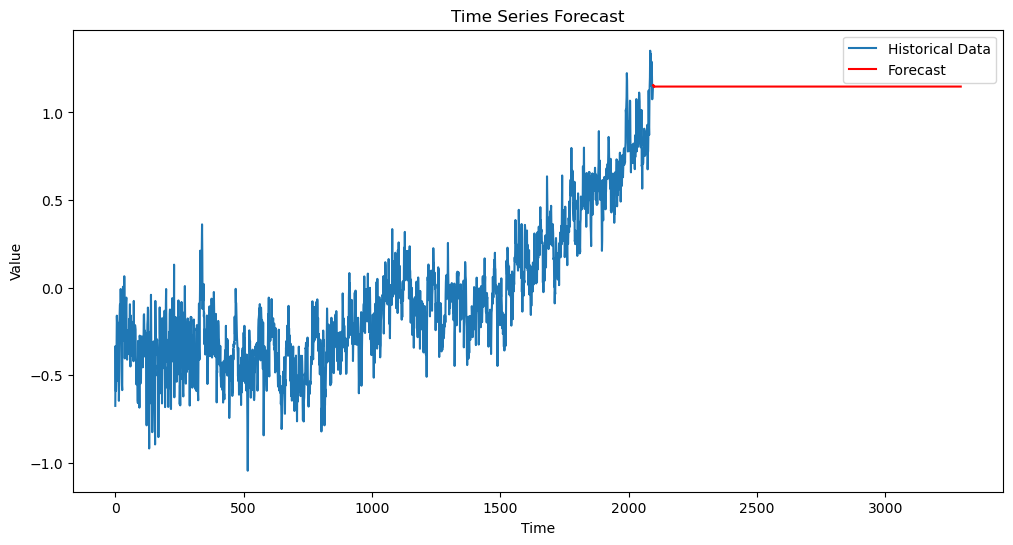

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming T is your numpy array of length ~2000
# T = np.array([...])  # Your time series data goes here

# Fit an ARIMA model (you might need to adjust the order parameters)
model = ARIMA(T, order=(5, 1, 0))  # (p, d, q) order
model_fit = model.fit()

# Forecast the next 120 timesteps
n_steps = 1200
forecast = model_fit.forecast(steps=n_steps)

# Plot the historical data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(T, label='Historical Data')
plt.plot(np.arange(len(T), len(T) + n_steps), forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecast')
plt.legend()
plt.show()

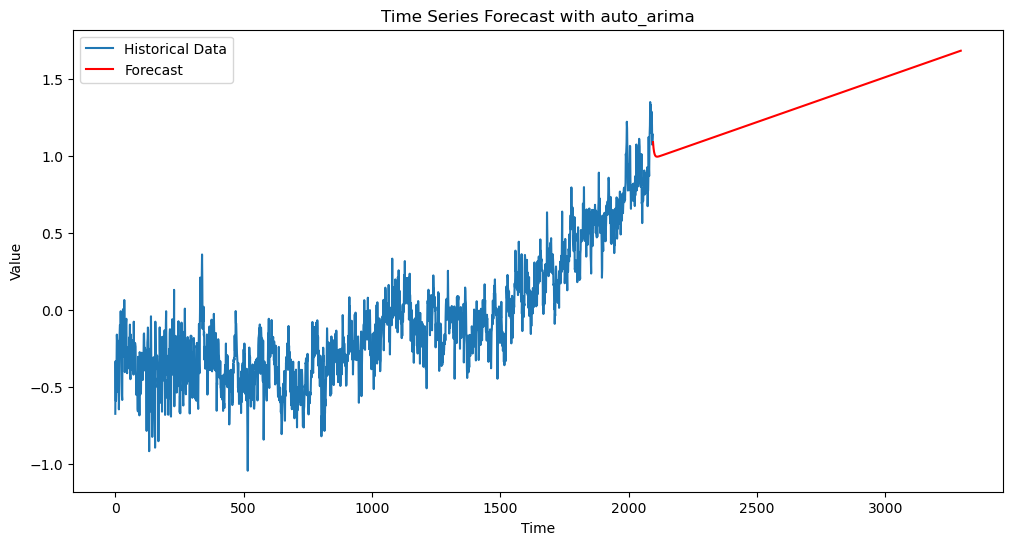

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# T = np.array([...])  # Your time series data

# Automatically determine the ARIMA order
model = auto_arima(T, seasonal=True, stepwise=True, suppress_warnings=True)

# Forecast the next 120 timesteps
n_steps = 1200
forecast = model.predict(n_periods=n_steps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(T, label='Historical Data')
plt.plot(np.arange(len(T), len(T) + n_steps), forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecast with auto_arima')
plt.legend()
plt.show()

In [99]:
F = forecast.reshape(-1, 12)
annual_mean = F.mean(axis=1).reshape(-1, 1)
annual_std = F.std(axis=1).reshape(-1, 1)
print('F shape', F.shape)
print('annual_mean shape', annual_mean.shape)
print('annual_std shape', annual_std.shape)

tmp = np.concatenate((F, annual_mean, annual_std), axis=1)

df_T_forecast_auto_arima = pd.DataFrame(tmp,)
# set index to 2025:
# set colnames to [jan, feb, ..., dec, annual_mean, annual_std]
# df_T_forecast_auto_arima.columns = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'annual_mean', 'annual_std']
df_T_forecast_auto_arima.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual', 'Annual_uncertainty']
df_T_forecast_auto_arima.index = pd.RangeIndex(start=2025, stop=2025+len(F))
df_T_forecast_auto_arima
df_T_forecast_auto_arima.to_csv('data/T_forecast_auto_arima.csv')


F shape (100, 12)
annual_mean shape (100, 1)
annual_std shape (100, 1)


Epoch 1/50, Training Loss: 0.0337, Validation Loss: 0.5606
Epoch 10/50, Training Loss: 0.0145, Validation Loss: 0.0968
Epoch 20/50, Training Loss: 0.0110, Validation Loss: 0.0481
Epoch 30/50, Training Loss: 0.0093, Validation Loss: 0.0365
Epoch 40/50, Training Loss: 0.0121, Validation Loss: 0.0357
Epoch 50/50, Training Loss: 0.0096, Validation Loss: 0.0406


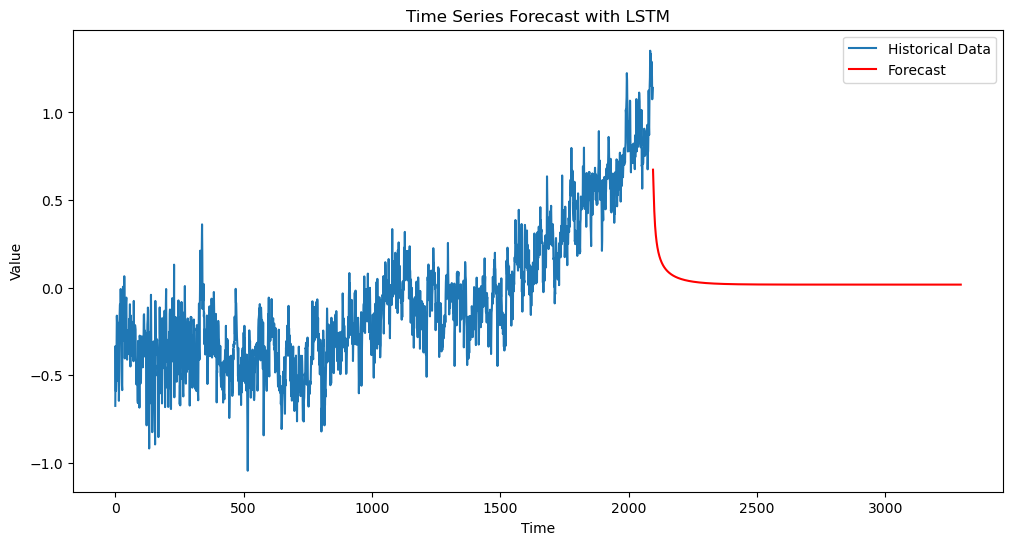

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

# Assuming T is your numpy array of length ~2000
# T = np.array([...])  # Your time series data goes here

# =========================
# Data Preparation
# =========================

# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
T_normalized = scaler.fit_transform(T.reshape(-1, 1))

# Convert data to PyTorch tensors
T_tensor = torch.FloatTensor(T_normalized).view(-1)

# Define a function to create sequences
def create_sequences(input_data, seq_length):
    sequences = []
    for i in range(len(input_data) - seq_length):
        seq = input_data[i:i+seq_length]
        label = input_data[i+seq_length]
        sequences.append((seq, label))
    return sequences

seq_length = 20  # You can adjust this parameter
sequences = create_sequences(T_tensor, seq_length)

# Split into training and validation datasets
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
val_sequences = sequences[train_size:]

# Create custom Dataset classes
class TimeSeriesDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq, label = self.sequences[idx]
        return seq, label

train_dataset = TimeSeriesDataset(train_sequences)
val_dataset = TimeSeriesDataset(val_sequences)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# =========================
# Define the LSTM Model
# =========================

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=20, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        # Forward propagate LSTM
        out, _ = self.lstm(x.unsqueeze(-1), (h0, c0))

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel()

# =========================
# Training the Model
# =========================

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50  # You can adjust this parameter

for epoch in range(num_epochs):
    model.train()
    for seq, label in train_loader:
        optimizer.zero_grad()
        y_pred = model(seq)
        loss = criterion(y_pred.squeeze(), label)
        loss.backward()
        optimizer.step()

    # Validation loss
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for seq, label in val_loader:
            y_pred = model(seq)
            val_loss += criterion(y_pred.squeeze(), label).item()
    val_loss /= len(val_loader)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}')

# =========================
# Forecasting
# =========================

# Start with the last sequence from the training data
model.eval()
last_seq = T_tensor[-seq_length:].unsqueeze(0)
predictions = []

with torch.no_grad():
    for _ in range(1200):
        y_pred = model(last_seq)
        predictions.append(y_pred.item())
        # Update the sequence by appending the predicted value and removing the first value
        # print(last_seq.shape)
        # print(y_pred.shape)
        last_seq = torch.cat((last_seq[:, 1:], y_pred), dim=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# =========================
# Plotting the Results
# =========================

# Plot the historical data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(T, label='Historical Data')
plt.plot(np.arange(len(T), len(T) + 1200), predictions, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecast with LSTM')
plt.legend()
plt.show()

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer, QuantileLoss

# =========================
# Data Preparation
# =========================

# Assuming T is your numpy array of length ~2000
# T = np.array([...])  # Your time series data goes here

# Create a pandas DataFrame
df = pd.DataFrame({
    'time_idx': np.arange(len(T)),
    'value': T,
    'group': 'series'  # Identifier for the time series group
})

# Define the maximum encoder and decoder lengths
max_encoder_length = 60   # Length of history to use for predictions
max_prediction_length = 1200  # Length of future predictions

# Create the TimeSeriesDataSet
training_cutoff = df['time_idx'].max() - max_prediction_length
training = TimeSeriesDataSet(
    df[df.time_idx <= training_cutoff],
    time_idx='time_idx',
    target='value',
    group_ids=['group'],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_unknown_reals=['value'],
)

# Create validation dataset
validation = TimeSeriesDataSet.from_dataset(
    training, df, min_prediction_idx=training_cutoff + 1
)

# Create dataloaders
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

# =========================
# Define the Model
# =========================

# Create the Temporal Fusion Transformer model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # Quantiles
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# =========================
# Training the Model
# =========================

trainer = Trainer(
    max_epochs=30,
    accelerator='cpu',  # Set to 'gpu' if you have a GPU
    gradient_clip_val=0.1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4),
        LearningRateMonitor('epoch'),
    ],
)

trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

# =========================
# Forecasting
# =========================

# Load the best model
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

# Make predictions for the next 120 timesteps
# Create a dataset including the future time indices
future_df = pd.DataFrame({
    'time_idx': np.arange(len(T) + max_prediction_length),
    'group': 'series',
})

# Merge with the original data
future_df = future_df.merge(df[['time_idx', 'value']], on='time_idx', how='left')

# Create dataset for prediction
future_dataset = TimeSeriesDataSet(
    future_df,
    time_idx='time_idx',
    target='value',
    group_ids=['group'],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_unknown_reals=['value'],
)

# Create dataloader for prediction
future_dataloader = future_dataset.to_dataloader(train=False, batch_size=1, num_workers=0)

# Predict the future
raw_predictions, x = best_tft.predict(future_dataloader, mode='raw', return_x=True)

# Extract predictions
predictions = best_tft.to_prediction(raw_predictions).numpy().flatten()[-max_prediction_length:]

# =========================
# Plotting the Results
# =========================

# Plot the historical data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['time_idx'], df['value'], label='Historical Data')
plt.plot(
    np.arange(len(T), len(T) + max_prediction_length),
    predictions,
    label='Forecast',
    color='red'
)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecast with Temporal Fusion Transformer')
plt.legend()
plt.show()

ImportError: cannot import name 'maybe_upload_prof_stats_to_manifold' from 'torch._utils_internal' (/Users/tonton/anaconda3/envs/t2mENV/lib/python3.9/site-packages/torch/_utils_internal.py)

In [84]:
pip install pytorch-forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 10.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 10.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.
